##### Week 8 Assignment,
Data 620,
##### Team 1: Jason Givens-Doyle, Mehdi Khan, Paul Britton

In [1]:
import nltk
from urllib.request import urlopen
from nltk.text import Text
from nltk.corpus import stopwords
import re
from bs4 import BeautifulSoup as soup
from nltk.probability import FreqDist
import matplotlib.pyplot as plt
import pandas as pd

The first part of the book "Goldfish" by Arthur Train was loaded from http://www.fullbooks.com. urlib package was used to open the url using urlopen function and  the entire content of this portion of the book was downloaded with everything in it.  The 'punkt' package from nltk was also downloaded for some language processing operations

In [2]:
#url='https://norvig.com/ngrams/shakespeare.txt'
url = 'http://www.fullbooks.com/The-Goldfish-1.html'
rawText = urlopen(url).read().decode('utf-8')
nltk.download('punkt') 
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Paul\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Paul\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

Before any language processes were done the total length of the raw text was counted:

In [3]:
len(rawText)


122906

In [4]:
print(rawText[1:500])

!DOCTYPE HTML PUBLIC "-//IETF//DTD HTML//EN">
<HTML>
<HEAD>
<TITLE>The "Goldfish" by Arthur Train - Full Text Free Book (Part 1/4)</TITLE>
<style fprolloverstyle>A:hover {color: #808000}
</style>
</HEAD>
<BODY BGCOLOR="#FFFFFF" TEXT="#000000" LINK="#0000FF" ALINK="#9F5F9F" VLINK="#FF0000">


<div align="center">
<table border="0" cellpadding="2" width="99%" bgcolor="#FFFFFF">
<tr><td width="100%">

<center>

<h1><font face="Arial">The "Goldfish"<br>by<br>Arthur Train</font></h1>


As seen above the Corpus in its raw form includes a lot of html tags, numeric characters, punctuation and meaningless characters, which were removed using Regular Expression and BeautifulSoup package:  

In [5]:
cleanWords = soup(rawText).get_text()
#re.sub('<.*?>','',rawText)
cleanWords = re.sub('[^A-Za-z]+',' ',cleanWords.lower())

In [6]:
print(cleanWords[:200])

 the goldfish by arthur train full text free book part a hover color the goldfish byarthur train part out of fullbooks com homepage index of the goldfish next part google ad client pub google alternat


After cleaning the raw text, the Corpus was tokenized:

In [7]:
token_words = nltk.word_tokenize(cleanWords)

In [8]:
token_words[:20]

['the',
 'goldfish',
 'by',
 'arthur',
 'train',
 'full',
 'text',
 'free',
 'book',
 'part',
 'a',
 'hover',
 'color',
 'the',
 'goldfish',
 'byarthur',
 'train',
 'part',
 'out',
 'of']

At the this point the Corpus was relatively clean but it still includes common words, which would be removed later. The total count of all the unique words at this stage is:

In [9]:
len(set(token_words))

3882

After tokenization all the noise, i.e. common words or stop words (such as 'The', 'A', 'am', 'are','is', 'of', 'by', etc.) needed to be removed. A list of english stopwords were created and then those words were filtered out from the word tokens.

In [10]:
stopWords = set(stopwords.words('english'))

Remove stopwords:

In [11]:
no_stopwords_token = [w for w in token_words if w not in stopWords]


In [12]:
no_stopwords_token[1:30]

['arthur',
 'train',
 'full',
 'text',
 'free',
 'book',
 'part',
 'hover',
 'color',
 'goldfish',
 'byarthur',
 'train',
 'part',
 'fullbooks',
 'com',
 'homepage',
 'index',
 'goldfish',
 'next',
 'part',
 'google',
 'ad',
 'client',
 'pub',
 'google',
 'alternate',
 'ad',
 'url',
 'http']

After removing the common words, the total number of unique words are:

In [13]:
len(set((no_stopwords_token)))

3755

Frquency of the unique words in the final Corpus:

In [14]:
fdist = FreqDist(no_stopwords_token)

In [15]:
fdist

FreqDist({'dollars': 95, 'one': 89, 'five': 64, 'hundred': 64, 'would': 59, 'two': 53, 'wife': 49, 'thousand': 49, 'could': 41, 'time': 41, ...})

As indicated below 4,865 words represent half of the Corpus. How many unique words would represent the same number of words were also counted below:

In [16]:
len(no_stopwords_token)/2

4864.5

In [17]:
words = []
val =0
sortedFdist = [(k,fdist[k]) for k in sorted(fdist, key=fdist.get, reverse=True)]
for key,value in sortedFdist:
    val = val + value    
    if val < (len(no_stopwords_token)/2):
        words.append(key)
    if val > (len(no_stopwords_token)/2):
        break  

In [18]:
len(words)

451

So 451 unique words represent half of the total words in the corpus

200 highest frequency words in this corpus:

In [19]:
highest_frequency = fdist.most_common(200)

In [20]:
highest_frequency

[('dollars', 95),
 ('one', 89),
 ('five', 64),
 ('hundred', 64),
 ('would', 59),
 ('two', 53),
 ('wife', 49),
 ('thousand', 49),
 ('could', 41),
 ('time', 41),
 ('man', 39),
 ('go', 38),
 ('old', 36),
 ('men', 36),
 ('good', 34),
 ('house', 30),
 ('fifty', 30),
 ('years', 30),
 ('dinner', 30),
 ('part', 29),
 ('like', 29),
 ('yet', 29),
 ('us', 29),
 ('even', 27),
 ('well', 27),
 ('must', 27),
 ('new', 27),
 ('life', 25),
 ('ten', 25),
 ('cost', 25),
 ('year', 25),
 ('half', 24),
 ('twenty', 24),
 ('without', 24),
 ('way', 23),
 ('never', 23),
 ('less', 22),
 ('say', 22),
 ('day', 21),
 ('things', 21),
 ('get', 20),
 ('first', 20),
 ('may', 20),
 ('fact', 20),
 ('every', 20),
 ('people', 20),
 ('friends', 19),
 ('thirty', 19),
 ('much', 19),
 ('see', 19),
 ('made', 19),
 ('home', 19),
 ('social', 19),
 ('long', 18),
 ('success', 18),
 ('least', 18),
 ('room', 18),
 ('give', 18),
 ('however', 18),
 ('little', 18),
 ('society', 18),
 ('far', 17),
 ('course', 17),
 ('daughters', 17),
 ('m

A graph that shows the relative frequency of these 200 most frequent words:

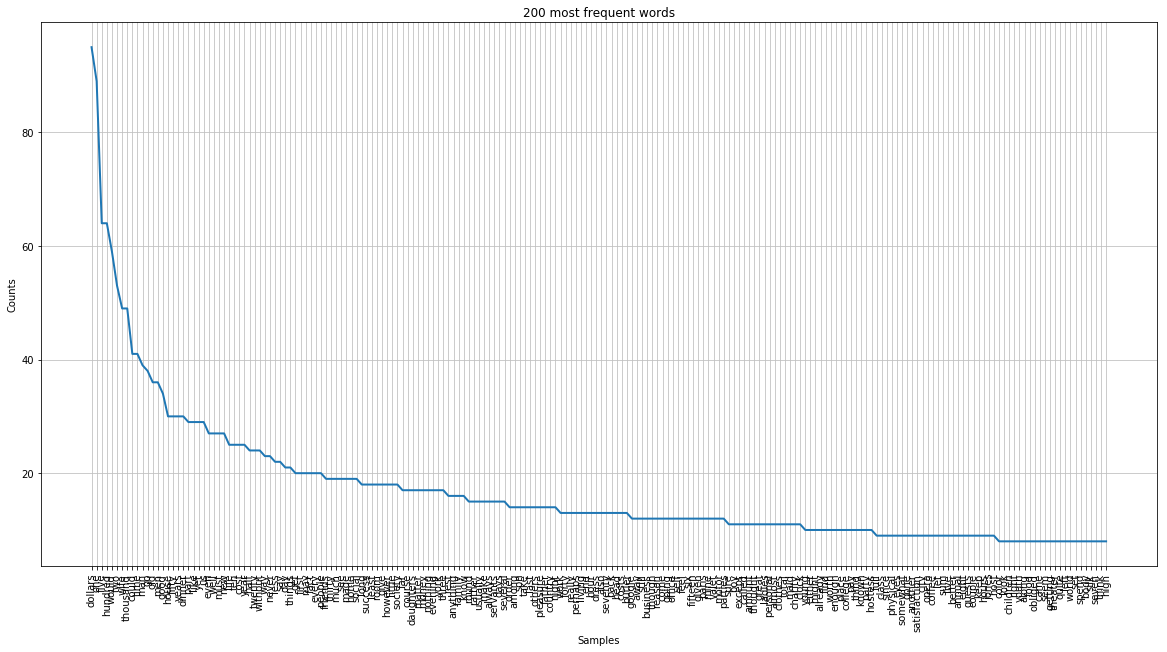

In [21]:
plt.figure(figsize=(20,10))
fdist.plot(200,cumulative=False, title= "200 most frequent words")
plt.show()

Another way of plotting the same information depicted in the previous figure:

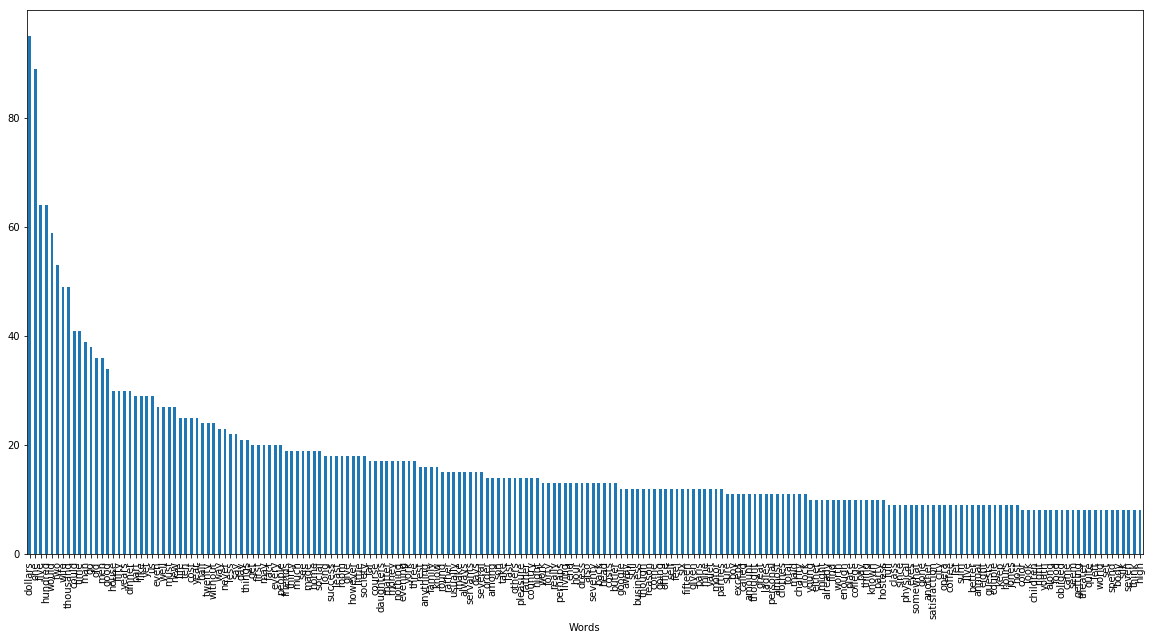

In [22]:
high_fqcyDB = pd.DataFrame(highest_frequency)
high_fqcyDB.columns = ["Words","Frequency"]
 
high_fqcyDB.plot.bar(x='Words',y='Frequency', figsize=(20,10), legend=False)

Next we'll take a look at our output as it related to Zipf's law, which states that the frequency of a word should be equal to 1/n where "n" is equal to the rank of the word.

First we'll set up the data:

In [23]:
zipf = high_fqcyDB

#add the required columns
zipf['rank'] = zipf.index.values+1
zipf['relative_Freq'] = zipf['Frequency'] / zipf['Frequency'].sum(axis=0)
zipf['zipf'] = 1/zipf['rank']
zipf.head(10)

,Words,Frequency,rank,relative_Freq,zipf
0,dollars,95,1,0.027810,1.000000
1,one,89,2,0.026054,0.500000
2,five,64,3,0.018735,0.333333
3,hundred,64,4,0.018735,0.250000
4,would,59,5,0.017272,0.200000
5,two,53,6,0.015515,0.166667
6,wife,49,7,0.014344,0.142857
7,thousand,49,8,0.014344,0.125000
8,could,41,9,0.012002,0.111111
9,time,41,10,0.012002,0.100000


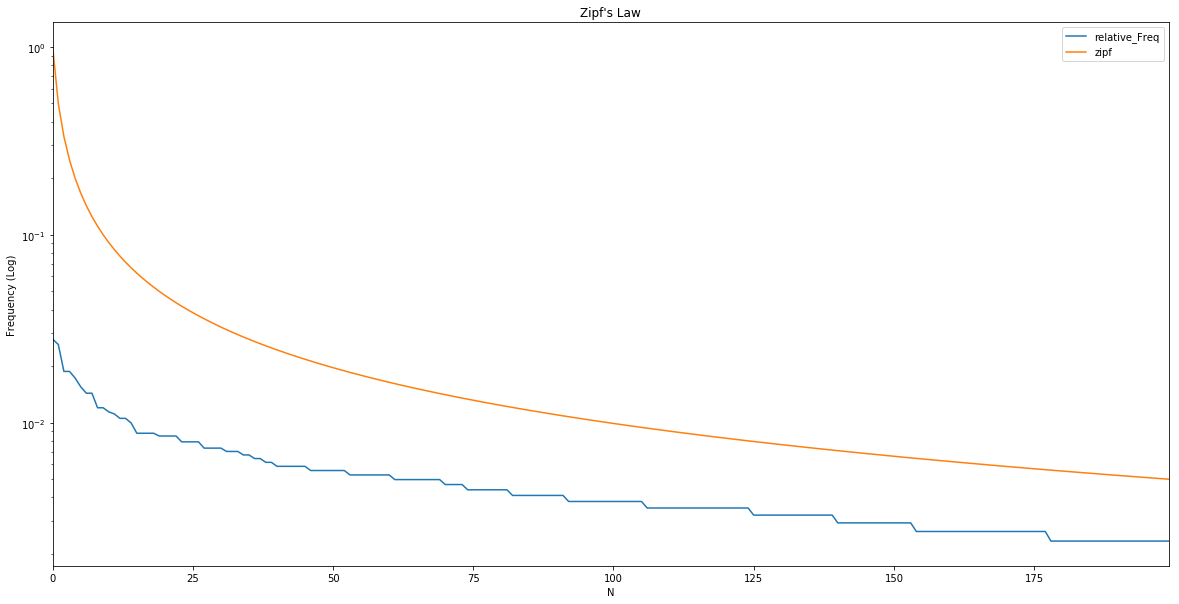

In [24]:
zipf[['relative_Freq','zipf']].plot(title="Zipf's Law",figsize=(20,10))
plt.yscale('log')
plt.ylabel('Frequency (Log)')
plt.xlabel('N')
plt.show()

When we plot the relative frequency of the data vs. where Zipf's law says it should be, we see that our data is consistently under the curve.  The most frequent words do not occur with the same frequency (particularly the most popular words) as the should according to Zipf's law.

In terms of how representative this data is of "all words in all corpora", we suspect that it is not particularly representative.  First of all, this particular text was published at the begninning of the 20th century, and as such, the lexicon may be different from more contemporary and voluminous content.  Words go in and out of fashion and can change meaning - many new words will have also come into existence since the creation of this text.

This text also represents very niche subject matter - success and extreme wealth in the early 1900s.  We see this in the most frequent words being money-related.  

Thirdly, if Zipf's law generally tends to hold, then the fact that it does not hold here suggests that this text may be an abberation from the norm.  

For these three reasons, we suspect that this text is likely not representative of all texts everywhere.
